# Dataset Simulation: Weight Loss 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Body-Mass-Index-(BMI)" data-toc-modified-id="Body-Mass-Index-(BMI)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Body Mass Index (BMI)</a></span></li><li><span><a href="#Basal-Metabolic-Rate-(BMR)" data-toc-modified-id="Basal-Metabolic-Rate-(BMR)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Basal Metabolic Rate (BMR)</a></span></li><li><span><a href="#Total-Daily-Energy-Expenditure-(TDEE)" data-toc-modified-id="Total-Daily-Energy-Expenditure-(TDEE)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Total Daily Energy Expenditure (TDEE)</a></span></li><li><span><a href="#Weight-Goal-and-Calorie-Deficit" data-toc-modified-id="Weight-Goal-and-Calorie-Deficit-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Weight Goal and Calorie Deficit</a></span></li></ul></li><li><span><a href="#Time" data-toc-modified-id="Time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time</a></span></li><li><span><a href="#Calories" data-toc-modified-id="Calories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calories</a></span></li><li><span><a href="#Calories-In" data-toc-modified-id="Calories-In-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calories In</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Weight-Loss" data-toc-modified-id="Weight-Loss-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Weight Loss</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# When you want to see whole dataset
#pd.set_option('display.max_rows', None)

# setting random seed for reproducible results.
np.random.seed(1)

## Introduction

This project simulates a dataset created by a woman - let's call her Zoe - who decided to track her weight loss efforts in a spreadsheet over the course of a calender year from 01/01/18 - 31/12/18. As a new years resolution she decided to begin eating less and exercising more in order to lose weight and be more healthy overall. To set herself up for success, she did a lot of research beforehand and was very fastidious in logging her calorie intake, estimated calorie output and actual weight loss.  

At its most basic, weight loss comes down to burning more calories you consume but there are several factors that can contribute to its complexity such as: (https://www.niddk.nih.gov/health-information/weight-management/adult-overweight-obesity/factors-affecting-weight-health)

- Genetics
- Race
- Sex
- Age
- Diet
- Physical activity
- Environment
- Medical issues

Zoe is a 30 year old white Irish woman who lives in the suburbs and works an office job. She has a moderately balanced diet (if perhaps a bit overindulgent!), exercises very little, and does not have any known medical issues that would have a direct affect on her weight. Since there are no glaring physical or environmental factors that should hinder her weight loss efforts, she believes that she can start to lose weight by making some slight lifestyle adjustments rather than any drastic changes. Fad diets or dietary supplements that promise quick weight-loss results are difficult to stick to long-term and can potentially be bad for one's health (https://www.indi.ie/fact-sheets/healthy-eating,-healthy-weight-and-dieting/436-the-truth-about-fad-diets-and-dietary-supplements-for-weight-loss.html) so Zoe decides to lower her calorie intake, without changing the type food she eats too much, and adds in a bit of exercise. 

There are some initial measurements that are useful to know before beginning any weight loss regimen:

- Body Mass index (BMI)
- Basal Metabolic Rate (BMR)
- Total Daily Energy Expenditure (TDEE)
- Weight goal and estimated calorie deficit

<br>


### Body Mass Index (BMI) 

BMI is a guideline used to determine if a person is underweight, an optimal weight, overweight or obese based on their height and weight. (https://en.wikipedia.org/wiki/Body_mass_index) The formula to determine BMI is **kg/m<sup>2</sup>** and the result categorises a person as follows:

<img src='https://files.prokerala.com/health/images/bmi-category.png' style='width: 300px'>


Based on Zoe's starting weight of 80kg and height of 175cm, her BMI is calculated below as 26.1, placing her in the overweight category and further confirming her desire to lose weight.

In [2]:
# Height (cm) and starting weight (kg) variables
height = 175
starting_weight = 80

# BMI function
def bmi(weight, height):
    result = weight/(height/100)**2
    return result

# Starting BMI
starting_bmi = bmi(starting_weight, height)
print("Starting BMI:", round(starting_bmi, 2) )

Starting BMI: 26.12


<br>

### Basal Metabolic Rate (BMR)

BMR is a person's estimated energy expenditure over the course of a day when they are at rest.(https://en.wikipedia.org/wiki/Basal_metabolic_rate) In other words, it is the number of calories burned by the body just performing basic functions like breathing or circulating blood. BMR is determined by a person's  weight, height, age and sex. There are many online calculators where a person can input these values to get an approximation of their BMR. Some use the Mifflin-St Jeor equation while others use the Harris-Benedict equation. (https://tdeecalculator.net/ ; https://www.calculator.net/bmr-calculator.html#; https://www.thecalculatorsite.com/health/bmr-calculator.php; https://www.bodybuilding.com/fun/bmr_calculator.htm ) The Mifflin-St Jeor equation is an updated version of the 100 year old Harris-Benedict equation and is considered to be more accurate to modern life (https://en.wikipedia.org/wiki/Harris%E2%80%93Benedict_equation) so Zoe decides to use this equation to calculate her BMR. The formula is as follows:

**<center>10 * weight(kg) + 6.25 * height(cm) - 5 * age(years) + s</center>**

where s represents sex and is a value of 5 for a male and -161 for a female.(https://www.omnicalculator.com/health/bmr) Zoe's BMR is calculated below with this formula as 1583 calories, meaning she burns approximately this number of calories at minimum every day.

In [3]:
# Variables to determine BMR.
age = 30
male = 5
female = -161

# BMR function
def bmr(weight, height, age, sex):
    result = 10 * weight + 6.25 * height - 5 * age + sex
    return result

# Calculating and displaying starting BMR.
starting_bmr = bmr(starting_weight, height, age, female)
print('Starting BMR: ', round(starting_bmr), 'calories.')

Starting BMR:  1583 calories.


<br>

### Total Daily Energy Expenditure (TDEE)

TDEE is a person's estimated energy expenditure when daily activity is taken into account.(https://tdeecalculator.net/) It is calculated by taking a person's BMR and multiplying it by a number that represents their activity level, ranging from sedentary to athlete. The image below shows the different activity multipliers that can be used to calculate TDEE: (https://www.thecalculatorsite.com/health/bmr-calculator.php)

<img src='https://i.imgur.com/J6Zydr4.png' style='width: 400px'>


TDEE thus represents the number of calories a person should consume if they want to maintain their current weight and so to lose weight they should aim to undercut this figure. Zoe considers herself to be quite sedentary as she does not exercise much and has a job where she is seated most of the day and so her TDEE is estimated below to be 1899 calories.

In [4]:
# TDEE function
def tdee(weight):
    result = bmr(weight, height, age, female) * 1.2
    return result
         
# Calculating and displaying starting TDEE
starting_tdee = tdee(starting_weight)
print('Starting TDEE:', round(starting_tdee), 'calories.')

Starting TDEE: 1899 calories.


<br>

### Weight Goal and Calorie Deficit

With a TDEE of 1899, Zoe needs to decide what kind of calorie deficit she wishes to make. She aims to lose weight in a slow, sustainable manner in the hopes of losing 12kg over the course of the year. It is often estimated that to lose a pound (0.454kg) of fat, one needs to burn about 3500 calories, (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/calories/art-20048065) but this should only be taken as a guideline, not a fact as it is, at the very least, an over-simplication.  (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4035446/) However, it serves as a useful starting point for someone looking to estimate their calorie deficit goals and so Zoe works her calculations based on a 3500 calorie deficit being equivalent to 454g weight loss. 

To reach her target of a 12kg loss in the year, Zoe will need to lose about 0.231kg every week. To simplify her calculations, she decides to follow the 3500 calorie deficit every fortnight, which should allow her to lose about 0.227g per week. As calculated below, this means she needs to cut her daily calorie intake by about 250 calories below her TDEE and so sets her daily allowance to 1649 calories

In [5]:
# Target total weight loss in grams
target = 12

# Target weekly weight loss
weekly_target = target/52
print('Target weekly weight loss:', str(round(weekly_target, 3)) + 'kg')

# Estimated number of kg per calorie based on 3500cal = 0.454kg
kg_per_cal = 0.454/3500 

# Function converting calories to kg 
def cal_to_kg(calories):
    kg = calories * kg_per_cal
    return kg

# Weekly and daily calorie deficits
weekly_cal_deficit = 1750
daily_cal_deficit = weekly_cal_deficit/7

# Weekly weight loss, daily calorie deficit and daily calorie allowance targets
print('')
print('Estimated weekly weight loss based on calorie deficit of', str(weekly_cal_deficit) + ':', str(cal_to_kg(weekly_cal_deficit)) + 'kg')
print('')
print('Daily calorie deficit required:', round(daily_cal_deficit))
print('')
print('Daily calorie allowance:', round(starting_tdee - daily_cal_deficit))

Target weekly weight loss: 0.231kg

Estimated weekly weight loss based on calorie deficit of 1750: 0.227kg

Daily calorie deficit required: 250

Daily calorie allowance: 1649


It should be noted that not all calories are created equal. Zoe could eat at a calorie deficit consisting entirely of junk food and still lose weight but this, of course, would not be healthy. She aims each day to follow the guide below when dividing her calorie allowance: (https://www.healthline.com/nutrition/best-macronutrient-ratio#calorie-vs-calorie)

    - 45-65% carbohydrates
    - 20-35% fats
    - 10-35% proteins 
    
In her spreadsheet, however, she focuses on calories in and out rather than specific macronutrients but she is generally quite good at sticking to the above ratios in order to have a balanced diet.

## Time

With her goals set, the next thing Zoe had to decide is how often to track her progress. She finds a lot of conflicting information online about how often one should weigh themselves when trying to lose weight. Some believe that weighing in too frequently can cause anxiety (https://health.clevelandclinic.org/why-you-shouldnt-weigh-yourself-every-single-day/) or discouragement (https://www.medicinenet.com/to_weigh__or_not_to_weighthat_is_the_question/views.htm) as weight fluctuations in the short-term can be quite unpredictable due to factors such as hydration or what was last eaten. However, some studies have shown that higher weighing frequency is associated with greater weight loss, (https://link.springer.com/article/10.1207/s15324796abm3003_5) less weight regain, (https://link.springer.com/article/10.1186/1479-5868-5-54) and is not associated with adverse psychological outcomes like anxiety (https://onlinelibrary.wiley.com/doi/full/10.1002/oby.20946). It really comes down to personal preference and what an individual feels works well for them. (https://blog.myfitnesspal.com/how-often-should-you-weigh-yourself/)

Zoe is interested in collecting as much data as possible to track her weight loss efforts and so decides to weigh herself first thing in the morning every day (https://www.consumerreports.org/scales/the-best-time-to-weigh-yourself/) as she finds the consistent feedback helps her to stay on track and keep herself accountable.

In [6]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekday.html

# Defining start and end dates.
start = '2018-01-01'
end = '2018-12-31'

# Creating the date rage.
date = pd.date_range(start, end, freq='D')

# Creating the dataframe and first column: date.
df = pd.DataFrame({'date': date})

# printing dataframe
df

,date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
360,2018-12-27
361,2018-12-28
362,2018-12-29
363,2018-12-30


A column column containing th day of the week is added so Zoe can see if she has any patterns in her behaviour depending on the day, such as days she tends to indulge a bit more than others or days she exercises more. She believer this will help her to be more conscious of her habits and tendencies. 

In [7]:
# Adding new column, days, which names the day of the week.
# https://stackoverflow.com/a/30222759
df['day'] = df['date'].dt.day_name()

# Change from object type to categorical type.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df['day'] = df['day'].astype('category')
df

,date,day
0,2018-01-01,Monday
1,2018-01-02,Tuesday
2,2018-01-03,Wednesday
3,2018-01-04,Thursday
4,2018-01-05,Friday
...,...,...
360,2018-12-27,Thursday
361,2018-12-28,Friday
362,2018-12-29,Saturday
363,2018-12-30,Sunday


## Calories 

 

For exercise, look into how different exercises affect weight loss - a combination of cardio, strength training and flexibility training: https://www.verywellfit.com/types-of-exercise-for-weight-loss-3495992

## Calories In

To track her calorie intake, Zoe used the LoseIt app, (https://www.loseit.com/) which allows her to log everything she eats and provides her with a calorie total at the end of every day that she then logs into her spreadsheet. 

. Based on this goal and her current weight of 80kg, the LoseIt app tells Zoe that she should aim to eat less than 1753 calories per day. She decides not to be too strict with herself about sticking to  specific goal such as this, which will change based  

It is not healthy to go below 1200 calories daily as it would be difficult to get the nutrition the body needs (https://www.everydayhealth.com/weight/can-more-calories-equal-more-weight-loss.aspx

 

The randint function allows me to set minimum and maximum calorie values and was my first thought when trying to come up with a suitable function. As can be seen below, it returns 365 integer values that could potentially be used as calorie measurements.

In [8]:
# Using randint for calorie in values
first_attempt = np.random.randint(1200, 2500, 365)
first_attempt

array([2261, 1435, 2296, 2105, 1915, 2047, 2160, 1344, 1329, 1949, 1708,
       2402, 2478, 1557, 2114, 1668, 2107, 1452, 1868, 1598, 1762, 1780,
       2439, 2201, 1953, 2310, 1341, 2231, 1519, 2029, 1713, 1516, 1409,
       2488, 1928, 1827, 1631, 1833, 1656, 1742, 2295, 1715, 2164, 1992,
       1697, 2267, 2250, 1821, 2083, 1215, 2288, 1396, 1225, 2246, 2199,
       2350, 1355, 2133, 1513, 1795, 2390, 1848, 1951, 2311, 1443, 1786,
       2414, 2128, 2375, 1895, 2096, 2477, 1661, 1764, 1669, 1349, 1915,
       1463, 1277, 1912, 2299, 2267, 1732, 2071, 2164, 1769, 1410, 1296,
       1469, 2234, 1479, 2049, 2089, 1352, 1616, 2364, 2417, 1806, 1689,
       1352, 2083, 2065, 1330, 1815, 1466, 1689, 1670, 2422, 1906, 1527,
       1376, 2239, 2101, 1370, 1220, 1830, 1478, 1685, 1826, 1809, 2234,
       2320, 1383, 1517, 1605, 2455, 2320, 1705, 2249, 2110, 1341, 2436,
       2011, 1896, 2111, 2219, 2361, 1650, 1399, 1620, 2069, 1960, 1221,
       1277, 1419, 1889, 1569, 1856, 2458, 1651, 20

However, the distribution for this function is uniform so Zoe is as likely to consume 2000 calories as she is to consume 1000 calories. Her daily calorie goal is the 1500 mark and so most values should ideally be centred around this figure. A normal distribution may work better. 

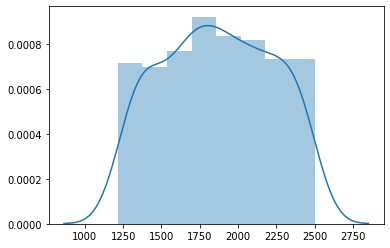

In [9]:
sns.distplot(first_attempt)
plt.show()

Again there is an issue as just using a regular normal distribution can return some values that are unrealistically below the minimum threshold of 1200 calories. Setting the mean to 1500 and 

In [10]:
second_attempt = np.random.normal(1500, 200, 365)
second_attempt

array([1390.8451664 , 1460.23242742, 1359.92029902, 1459.32111021,
       1548.53388822, 1540.36603577, 1632.20405752, 1858.4316418 ,
       1475.90708564, 1253.37585291, 1263.5363747 , 1366.84909636,
       1165.16083848, 1665.00596489, 1400.35728727, 1437.80300434,
       1499.62170343, 1220.67591508, 1327.73672784, 1634.94230514,
       1623.70782616, 1411.36561386, 1862.10698283, 1238.85461549,
       1431.00255797, 1453.83205137,  941.38299997, 1887.50576272,
       1573.26640291, 1291.08212362, 1910.23468857, 1617.13240003,
       1585.905228  , 1378.60032036, 1521.24454481, 1194.86393675,
       1659.00521888, 1425.11233623, 1526.80963931, 1740.41097244,
       1556.94962217, 1552.49348909, 1555.29986096, 1353.34567922,
       1667.20094389, 1808.67182216, 1651.76113202, 1676.98176289,
       1324.54369622, 1326.44255543, 1211.82479514, 1746.45061417,
       1449.16402648, 1779.9687885 , 1343.61766346, 1412.49820343,
       1519.08501744, 1684.29001373, 1512.15003916, 1542.22495

The solution seemed to be using what is called a truncated normal distribution,(https://en.wikipedia.org/wiki/Truncated_normal_distribution) which allows upper and lower limits to be set and the data within is normally distributed. The function created below  uses *truncnorm* to generate 365 random numbers that are:

- not less than 1200. 
- not greater than 2500. 
- centre around an average value of 1500 with a standard deviation of 200.

The numbers are converted to integer values as no one would realistically track decimals of a calorie. The array below shows the output of the function and the numbers look to be an accurate representation of what is required. 

In [11]:
# https://stackoverflow.com/a/18444710 
# https://stackoverflow.com/a/53948014
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.truncnorm.html
# https://stackoverflow.com/a/37411711
    
def cal_in():
    low = 1200
    high = 2200
    mu = 1649
    sigma = 100
    x = stats.truncnorm((low - mu) / sigma, (high - mu) / sigma, loc=mu, scale=sigma)
    cal_val = x.rvs(365).astype(int)
    return cal_val

cal_in()

array([1542, 1429, 1706, 1665, 1731, 1650, 1730, 1700, 1725, 1625, 1686,
       1557, 1602, 1554, 1625, 1578, 1625, 1845, 1602, 1859, 1683, 1617,
       1755, 1679, 1582, 1730, 1632, 1612, 1605, 1700, 1587, 1736, 1595,
       1660, 1645, 1754, 1770, 1559, 1670, 1776, 1635, 1790, 1590, 1676,
       1696, 1574, 1428, 1627, 1803, 1608, 1726, 1555, 1608, 1543, 1706,
       1701, 1698, 1582, 1699, 1574, 1629, 1616, 1611, 1491, 1682, 1703,
       1677, 1687, 1553, 1545, 1652, 1764, 1558, 1639, 1631, 1648, 1550,
       1608, 1585, 1750, 1733, 1630, 1676, 1543, 1651, 1595, 1756, 1693,
       1683, 1533, 1641, 1870, 1811, 1686, 1546, 1684, 1665, 1641, 1630,
       1674, 1752, 1716, 1669, 1792, 1497, 1887, 1487, 1564, 1629, 1525,
       1680, 1482, 1592, 1494, 1702, 1692, 1618, 1560, 1715, 1607, 1731,
       1645, 1655, 1458, 1685, 1610, 1574, 1632, 1619, 1641, 1853, 1614,
       1724, 1662, 1771, 1611, 1580, 1783, 1477, 1814, 1663, 1617, 1906,
       1492, 1653, 1462, 1666, 1557, 1682, 1856, 17

The plot shows the distribution of these values. The vast majority are very close to the 1500 calorie mark as the standard deviation (sigma) was set quite low at only 100 calories. The reason for this is outlined below.

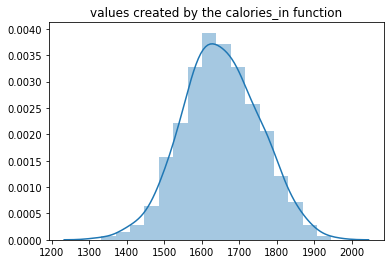

In [12]:
# Plotting the distribution of calories_in
sns.distplot(cal_in()) 
plt.title('values created by the calories_in function')
plt.show()

Like many people,  Zoe tends to consume more calories over the weekend than during the week. (https://www.webmd.com/diet/features/avoid-weekend-weight-gain#1) Being aware of this, she tries as best she can to stick closely to the 1500 calorie budget during the week. To reflect this, the sigma value in the *cal_in* function above was set to just 100 calories to keep values close to 1500. At the weekend she can potentially consume between 250-500 calories (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5928328/) over her target calorie amount. When creating the calories_in column below, the days Saturday and Sunday get a random integer between 250-500 added to the value that was generated by the *cal_in* function. 

In [13]:
# https://note.nkmk.me/en/python-numpy-where/
# https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

# Creating extra calorie amounts to be added to weekends.
extra_cal = np.random.randint(200, 400)

# Creating calories_in column with weekend values adjusted.
df['calories_in'] = np.where((((df['day'])=='Saturday') | ((df['day'])=='Sunday')), cal_in() + extra_cal, cal_in())

df

,date,day,calories_in
0,2018-01-01,Monday,1624
1,2018-01-02,Tuesday,1526
2,2018-01-03,Wednesday,1600
3,2018-01-04,Thursday,1601
4,2018-01-05,Friday,1380
...,...,...,...
360,2018-12-27,Thursday,1735
361,2018-12-28,Friday,1730
362,2018-12-29,Saturday,1850
363,2018-12-30,Sunday,1847


In [14]:
df.calories_in.mean()

1739.3616438356164

## Exercise


With random choice the options are (None, Walk, Jog, Yoga)

Use choice as you can set probability for each option.

Say I do some form of exercise about 5 days per week: None = 2 * 17 = 34 days of no exercise = ~28% (make it 29 for 100% probability altogether)

Walk 3 days per week: Walk = 3 * 104 = 51 walks = ~43%

Jog 1 day per week = 17 jogs = ~14%

Yoga class about 1 day per week = 17 yoga classes = ~14%

Exercise not the most important thing for weight loss: https://www.vox.com/2016/4/28/11518804/weight-loss-exercise-myth-burn-calories

Exercise and calories burned: https://www.sciencealert.com/how-to-calculate-calories-burned-met-value-exercise?perpetual=yes&limitstart=1

In [15]:
# List of exercise activities.
# https://stackoverflow.com/a/52923373
activities = ["none", "walk", "jog", "yoga"]

# Separating out days of the week.
sat = df['day'] == 'Saturday'
sun = df['day'] == 'Sunday'
mon = df['day'] == 'Monday'
tue = df['day'] == 'Tuesday'
wed = df['day'] == 'Wednesday'
thu = df['day'] == 'Thursday'
fri = df['day'] == 'Friday'

# Setting exercise probabilities for each day
psat = np.random.choice(activities, size = (365), p=[0, 0.5, 0.2, 0.3])
psun = np.random.choice(activities, size = (365), p=[0, 0.75, 0.25, 0])
pmon = np.random.choice(activities, size = (365), p=[0.4, 0.5, 0.1, 0])
ptue = np.random.choice(activities, size = (365), p=[0.15, 0.25, 0.1, 0.5])
pwed = np.random.choice(activities, size = (365), p=[0.3, 0.5, 0.2, 0])
pthu = np.random.choice(activities, size = (365), p=[0.3, 0.2, 0, 0.5])
pfri = np.random.choice(activities, size = (365), p=[0.2, 0.4, 0.4, 0])

# Creating exercise column
df['exercise'] = np.select([sat, sun, mon, tue, wed, thu, fri], [psat, psun, pmon, ptue, pwed, pthu, pfri], default=np.nan)

# Change from object type to categorical type.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df['exercise'] = df['exercise'].astype('category')

df

,date,day,calories_in,exercise
0,2018-01-01,Monday,1624,none
1,2018-01-02,Tuesday,1526,jog
2,2018-01-03,Wednesday,1600,jog
3,2018-01-04,Thursday,1601,yoga
4,2018-01-05,Friday,1380,none
...,...,...,...,...
360,2018-12-27,Thursday,1735,none
361,2018-12-28,Friday,1730,jog
362,2018-12-29,Saturday,1850,walk
363,2018-12-30,Sunday,1847,jog


Below is a function that tracks the estimated calories burned by exercising. Zoe exercises most days per week and averages at about 45 minutes per session. She uses her fitbit (https://www.fitbit.com/ie/home) to approximate the number of calories burned during each exercise session and logs that into her spreadsheet.  

In [16]:
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function

def exercise_cals(row):
    if row['exercise'] == 'yoga':
        return int(np.random.normal(150, 50))
    if row['exercise'] == 'walk':
        return int(np.random.normal(250, 50))
    if row['exercise'] == 'jog':
        return int(np.random.normal(300))
    if row['exercise'] == 'none':
        return 0
    
df['exercise_cals'] = df.apply(lambda row: exercise_cals(row), axis = 1)
df

,date,day,calories_in,exercise,exercise_cals
0,2018-01-01,Monday,1624,none,0
1,2018-01-02,Tuesday,1526,jog,299
2,2018-01-03,Wednesday,1600,jog,299
3,2018-01-04,Thursday,1601,yoga,129
4,2018-01-05,Friday,1380,none,0
...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0
361,2018-12-28,Friday,1730,jog,298
362,2018-12-29,Saturday,1850,walk,260
363,2018-12-30,Sunday,1847,jog,300


Since BMR and TDEE are both going to change as weight fluctuates, I have created the function below to recalculate them each day as part of the calories burned. I have used the Mifflin-St Jeor calculation as it is widely used and deemed to be quite accurate

In [17]:
# https://stackoverflow.com/a/36459273
# https://stackoverflow.com/a/16327135
df['tdee'] = np.nan
df.loc[0, 'tdee'] = starting_tdee
df

,date,day,calories_in,exercise,exercise_cals,tdee
0,2018-01-01,Monday,1624,none,0,1899.3
1,2018-01-02,Tuesday,1526,jog,299,NaN
2,2018-01-03,Wednesday,1600,jog,299,NaN
3,2018-01-04,Thursday,1601,yoga,129,NaN
4,2018-01-05,Friday,1380,none,0,NaN
...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,NaN
361,2018-12-28,Friday,1730,jog,298,NaN
362,2018-12-29,Saturday,1850,walk,260,NaN
363,2018-12-30,Sunday,1847,jog,300,NaN


Total calorie output is the sum of tdee and exercise_cals to figure out the total estimated number of calories burned each day

In [18]:
# df['calories_out'] = df['exercise_cals'] + df['tdee']
df['calories_out'] = np.nan
df.loc[0, 'calories_out'] = df.loc[0, 'exercise_cals'] + df.loc[0, 'tdee']
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out
0,2018-01-01,Monday,1624,none,0,1899.3,1899.3
1,2018-01-02,Tuesday,1526,jog,299,NaN,NaN
2,2018-01-03,Wednesday,1600,jog,299,NaN,NaN
3,2018-01-04,Thursday,1601,yoga,129,NaN,NaN
4,2018-01-05,Friday,1380,none,0,NaN,NaN
...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,NaN,NaN
361,2018-12-28,Friday,1730,jog,298,NaN,NaN
362,2018-12-29,Saturday,1850,walk,260,NaN,NaN
363,2018-12-30,Sunday,1847,jog,300,NaN,NaN


Calorie difference

In [19]:
#df['cal_dif'] = df['calories_out'] - df['calories_in']
df['cal_dif'] = np.nan
df.loc[0, 'cal_dif'] = df.loc[0, 'calories_in'] - df.loc[0, 'calories_out']
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif
0,2018-01-01,Monday,1624,none,0,1899.3,1899.3,-275.3
1,2018-01-02,Tuesday,1526,jog,299,NaN,NaN,NaN
2,2018-01-03,Wednesday,1600,jog,299,NaN,NaN,NaN
3,2018-01-04,Thursday,1601,yoga,129,NaN,NaN,NaN
4,2018-01-05,Friday,1380,none,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,NaN,NaN,NaN
361,2018-12-28,Friday,1730,jog,298,NaN,NaN,NaN
362,2018-12-29,Saturday,1850,walk,260,NaN,NaN,NaN
363,2018-12-30,Sunday,1847,jog,300,NaN,NaN,NaN


In [20]:
#df['kg_lost'] = cal_to_kg(df['cal_dif'])
df['kg_lost'] = np.nan
df.loc[0, 'kg_lost'] = cal_to_kg(df.loc[0, 'cal_dif'])
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost
0,2018-01-01,Monday,1624,none,0,1899.3,1899.3,-275.3,-0.03571
1,2018-01-02,Tuesday,1526,jog,299,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1600,jog,299,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1601,yoga,129,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1380,none,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,NaN,NaN,NaN,NaN
361,2018-12-28,Friday,1730,jog,298,NaN,NaN,NaN,NaN
362,2018-12-29,Saturday,1850,walk,260,NaN,NaN,NaN,NaN
363,2018-12-30,Sunday,1847,jog,300,NaN,NaN,NaN,NaN


In [21]:
#['weight'] = np.nan
#df['weight'].iloc[[0]] = 80 - df['kg_lost']
#df

#weight = 80
#df['weight'] = weight - df['kg_lost']
#df



df['weight'] = np.nan
df.loc[0, 'weight'] = starting_weight + df.loc[0, 'kg_lost']
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight
0,2018-01-01,Monday,1624,none,0,1899.3,1899.3,-275.3,-0.03571,79.96429
1,2018-01-02,Tuesday,1526,jog,299,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1600,jog,299,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1601,yoga,129,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1380,none,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,NaN,NaN,NaN,NaN,NaN
361,2018-12-28,Friday,1730,jog,298,NaN,NaN,NaN,NaN,NaN
362,2018-12-29,Saturday,1850,walk,260,NaN,NaN,NaN,NaN,NaN
363,2018-12-30,Sunday,1847,jog,300,NaN,NaN,NaN,NaN,NaN


In [22]:
# BMI

starting_bmi = bmi(starting_weight, height/100)
df['bmi'] = np.nan
df.loc[0, 'bmi'] = bmi(df.loc[0, 'weight'], height)
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1624,none,0,1899.3,1899.3,-275.3,-0.03571,79.96429,26.110788
1,2018-01-02,Tuesday,1526,jog,299,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1600,jog,299,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1601,yoga,129,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1380,none,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,NaN,NaN,NaN,NaN,NaN,NaN
361,2018-12-28,Friday,1730,jog,298,NaN,NaN,NaN,NaN,NaN,NaN
362,2018-12-29,Saturday,1850,walk,260,NaN,NaN,NaN,NaN,NaN,NaN
363,2018-12-30,Sunday,1847,jog,300,NaN,NaN,NaN,NaN,NaN,NaN


## Weight Loss

Could I do some kind of probability distribution that makes total weight go up/down?

Or have one column with weight lost daily/weekly and then add/subtrct that to total weight in another column?

Weight lost every week: Say I lose an average of 0.5kg per week with a standard deviation of 0.25 and over a normal distribution.

Or with daily say it's 0.1kg per day average with a sd of 0.05g

No! I should base the weight loss on the other variables - exercise and calories - with a random amount added or subtracted as weight loss is not exact (is this noise?)


To account for daily fluctuations, weight loss or gain will not only depend on calories in/out but will also include a random variant. 


In [23]:
# TDEE function
# only weight will change in this calculation

#weight = df['weight'].iloc[[0]]

#def tdee(weight):
 #   bmr = 10 * weight + 6.25 * 175 - 5 * 30 -161
  #  result = bmr * 1.2
   # return result

#df['tdee'] = tdee(weight)
#df

In [24]:
# https://stackoverflow.com/a/34856727 
for i in range(1, len(df)):
    df.loc[i, 'tdee'] = tdee(df.loc[i-1, 'weight'])
    
    df.loc[i, 'calories_out'] = df.loc[i, 'exercise_cals'] + df.loc[i, 'tdee']
    
    df.loc[i, 'cal_dif'] = df.loc[i, 'calories_in'] - df.loc[i, 'calories_out'] 
    
    df.loc[i, 'kg_lost'] = cal_to_kg(df.loc[i, 'cal_dif']) + (np.random.choice((-1, 1)) * np.random.normal(0.03, 0.02))
    
    df.loc[i, 'weight'] = df.loc[i-1, 'weight'] + df.loc[i, 'kg_lost'] 
    
    df.loc[i, 'bmi'] = bmi(df.loc[i, 'weight'], height)

In [25]:
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1624,none,0,1899.300000,1899.300000,-275.300000,-0.035710,79.964290,26.110788
1,2018-01-02,Tuesday,1526,jog,299,1898.871476,2197.871476,-671.871476,-0.149245,79.815045,26.062056
2,2018-01-03,Wednesday,1600,jog,299,1897.080542,2196.080542,-596.080542,-0.106891,79.708154,26.027152
3,2018-01-04,Thursday,1601,yoga,129,1895.797853,2024.797853,-423.797853,-0.073575,79.634580,26.003128
4,2018-01-05,Friday,1380,none,0,1894.914954,1894.914954,-514.914954,-0.035259,79.599320,25.991615
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,1742.631787,1742.631787,-7.631787,0.072175,67.016491,21.882936
361,2018-12-28,Friday,1730,jog,298,1743.497889,2041.497889,-311.497889,-0.001592,67.014899,21.882416
362,2018-12-29,Saturday,1850,walk,260,1743.478786,2003.478786,-153.478786,-0.060870,66.954029,21.862540
363,2018-12-30,Sunday,1847,jog,300,1742.748352,2042.748352,-195.748352,-0.000774,66.953255,21.862287


In [26]:
# Converting to integers and rounding weight

df['tdee'] = df.tdee.astype(int)

df['calories_out'] = df.calories_out.astype(int)

df['cal_dif'] = df.cal_dif.astype(int)

df['weight']= df.weight.round(3)

In [27]:
df.dtypes

date             datetime64[ns]
day                    category
calories_in               int32
exercise               category
exercise_cals             int64
tdee                      int32
calories_out              int32
cal_dif                   int32
kg_lost                 float64
weight                  float64
bmi                     float64
dtype: object

In [28]:
df.kg_lost.std()

0.042126988715778184

In [29]:
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1624,none,0,1899,1899,-275,-0.035710,79.964,26.110788
1,2018-01-02,Tuesday,1526,jog,299,1898,2197,-671,-0.149245,79.815,26.062056
2,2018-01-03,Wednesday,1600,jog,299,1897,2196,-596,-0.106891,79.708,26.027152
3,2018-01-04,Thursday,1601,yoga,129,1895,2024,-423,-0.073575,79.635,26.003128
4,2018-01-05,Friday,1380,none,0,1894,1894,-514,-0.035259,79.599,25.991615
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,1742,1742,-7,0.072175,67.016,21.882936
361,2018-12-28,Friday,1730,jog,298,1743,2041,-311,-0.001592,67.015,21.882416
362,2018-12-29,Saturday,1850,walk,260,1743,2003,-153,-0.060870,66.954,21.862540
363,2018-12-30,Sunday,1847,jog,300,1742,2042,-195,-0.000774,66.953,21.862287


In [30]:
# if i want to make date the index
#df = df.set_index('date')

In [31]:
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight,bmi
0,2018-01-01,Monday,1624,none,0,1899,1899,-275,-0.035710,79.964,26.110788
1,2018-01-02,Tuesday,1526,jog,299,1898,2197,-671,-0.149245,79.815,26.062056
2,2018-01-03,Wednesday,1600,jog,299,1897,2196,-596,-0.106891,79.708,26.027152
3,2018-01-04,Thursday,1601,yoga,129,1895,2024,-423,-0.073575,79.635,26.003128
4,2018-01-05,Friday,1380,none,0,1894,1894,-514,-0.035259,79.599,25.991615
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,Thursday,1735,none,0,1742,1742,-7,0.072175,67.016,21.882936
361,2018-12-28,Friday,1730,jog,298,1743,2041,-311,-0.001592,67.015,21.882416
362,2018-12-29,Saturday,1850,walk,260,1743,2003,-153,-0.060870,66.954,21.862540
363,2018-12-30,Sunday,1847,jog,300,1742,2042,-195,-0.000774,66.953,21.862287
